# ML4DS - Model Selection

## Introduction

You will explore the various options for model selection on a *clustering* task.

In the first section, you will use synthetic data, where we know the true number of clusters. In the second (which will make up the assessed task), you will compare multiple methods for model selection on a real dataset.

## Import Packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
from scipy import linalg
import matplotlib as mpl

# Part 1: synthetic data

### Generate some data

Make data from a mixture of gaussians using sklearn `make_blobs` method. Try experimenting with:
- The number of centers
- the `cluster_std`
- The total number of samples

### Answers
- centers:the number of centers to generate, or the fixed center location,default is 3 
- the `cluster_std`: (float) the standard deviation of the clusters
- if int: the total number of points equally devided among clusters 

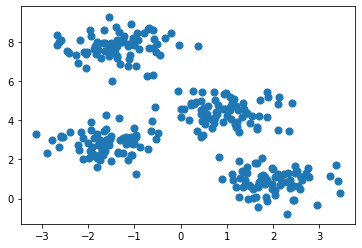

In [43]:

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


# Clustering - K-Means Example

Using the `KMeans` model, try and optimise, plot a graph of $K$ versus the `inertia_` value of the clustering. The `inertia_` value is the quantity that is minimised when K-means is training: the total sum of squared errors between the observations and the cluster centre to which they are assigned.

__Question__: what do you notice about this curve? Do you think you could use it to choose the correct number of clusters? See e.g. https://en.wikipedia.org/wiki/Elbow_method_(clustering). What happens when you vary the parameters used to generate the data (above)

__Question__ Choose K using the Elbow Method

__Question__: using the value of $K$ you have chosen, fit the clustering and then use the following code to plot the data coloured by cluster assignment. You can get the cluster assignment using the following code:
`y_kmeans = kmeans.predict(X)`

### Answers
- ans1:like elbow method ,we can use inertia value to explain which cluster numbers is the best. In the figure below,when we add one more cluser from 4 to 5, the total sum of squared errors didnt change too much, so 4 clusters are appropriate. If we change the centers above, the best cluster numbers in the below figure will be changed
- ans2:  we choose 4 
- ans3:  see below 

[1190.7823593643445, 546.8911504626296, 212.00599621083478, 188.7732355677372, 171.60084581851874, 154.5038244047431, 136.39069917436316]


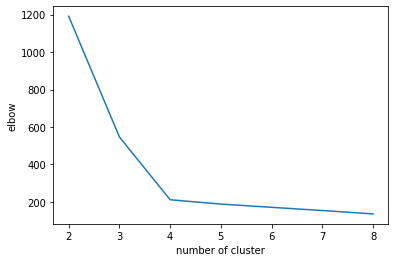

In [54]:
#ans2
def elbow(x):
    #x for coordinates
    auu=[]
    for i in range(2,9):
        kmeans=KMeans(n_clusters=i).fit(x)
        m=kmeans.labels_
        c=kmeans.cluster_centers_
        auu.append(kmeans.inertia_)
    c=plt.plot(np.arange(2,9),auu )
    plt.xticks(np.arange(2,9))#plot
    plt.xlabel('number of cluster')
    plt.ylabel('elbow')
    return auu
print(elbow(X))

In [50]:
#ans3
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

#kmeans = KMeans(n_clusters=4, random_state=10)
y_kmeans = kmeans.predict(X)


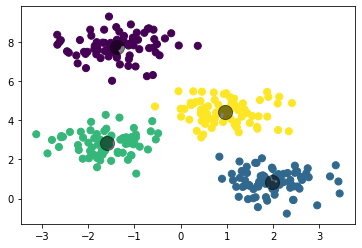

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Silhouette Score for K for K-Means

The silhouette score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is a method for optimising $K$ in a clustering setting. It computes how similar objects are to other objects within their cluster compared to how similar they are to points in neighbouring clusters.

__Question__: make a plot of Silhouette scores for the example data above. Vary the data generation parameters. Does the optimal $K$ from Silhouette agree with that from inspecting the inertia?

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566
For n_clusters = 7 The average silhouette_score is : 0.42439982271583093
For n_clusters = 8 The average silhouette_score is : 0.3249897986721671
For n_clusters = 9 The average silhouette_score is : 0.34339638088479923
For n_clusters = 10 The average silhouette_score is : 0.34162450580368353
For n_clusters = 11 The average silhouette_score is : 0.35462204316664453
For n_clusters = 12 The average silhouette_score is : 0.3552677225315947
For n_clusters = 13 The average silhouette_score is : 0.3483469651878229
For n_clusters = 14 The average silhouette_score is : 0.3578664928196972
For n_clusters = 15 The average silhouette_score is : 

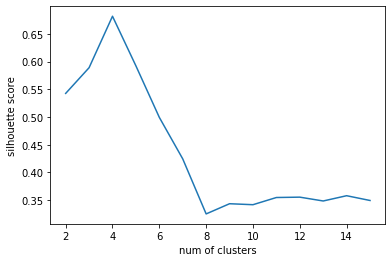

In [45]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
score=[]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
x_axis=range(2,16)
plt.xlabel("num of clusters")
plt.ylabel("silhouette score")
plt.plot(x_axis,score)
plt.show()

__Ans__:for the silhouette score, the best value is 1 and the worst value is -1, values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong clusters,as a different cluster is more similar. we can see the figure above, the best cluster number can be chosen by the silhouette score, n=4 clusters is the best with silhouette score:0.68199.

## BIC for K-means

Although K-means is not optimised by maximising the likelihood, you can compute a quanitity that is interpretable as BIC. To do this, compute:

$KD\ln(N) - E$

where $E$ is the negative of the `inertia_` property of K-means, and $D$ is the dimension of the data (in our case, 2).

__Question:__ for the data above, plot BIC for K-means as a function of $K$ for $K$ varying from 1 to 30. Does it agree with the previous answers?


In [52]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
e=kmeans.inertia_
e

1190.7823593643445

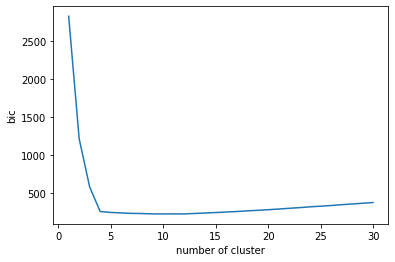

k with the lowest bic; value
11 226.2848919310821


In [57]:
N,D=300,2
bic=[]
for k in np.arange(1, 31):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    e=(-kmeans.inertia_)
    bic.append(np.log(X.shape[0])*k*D-e)

x_axis = range(1,31)
plt.xlabel('number of cluster')
plt.ylabel('bic')
plt.plot(x_axis,bic)
plt.show()


print('k with the lowest bic; value')
print(bic.index(min(bic)), min(bic))

__Answer__:for the figure above,we want to find the lowest bayes information criterion, which lies from 4 to 17. We can use index to find the lowest value, which is 226.3. So the best number of clusters is 11 under bic. We can also choose 4 here, beacause the bic is almost the same between k=4 and k=11.

# Mixture Models

Statistical mixture models are somewhat related to K-means but place the clustering problem within a statistical framework.

We will use Gaussian mixtures: models in which data from each cluster is assumed to come from a different Gaussian. With mixture models we have two model selection challenges: choosing $K$ and choosing the form of the Gaussian covariance matrices:

- spherical: the covariance matrices are of the form $\sigma^2\mathbf{I}$ (where $\mathbf{I}$ is an identity), i.e. the variance is the same in all dimensions and there is no correlation structure
- diagonal: there is no correlation structure, but the variance can be different in each dimension
- tied: all Gaussians share the same covariance matrix
- full: each Gaussian can have a different covariance matrix that can have full correlation structure

See https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

To create a Gaussian mixture object using sklearn with (say) a tied covariance structure, use:

```{python}
from sklearn import mixture
gmm = mixture.Gaussian(n_components = K,covariance_type='cv_type')
```

__Note__
- the `mixture.Gaussian` object has methods to compute BIC and AIC (`gmm.bic(X)` etc)
- you can also perform cross validation with a mixture, but computing the likelihood on held-out observations. The likelihood is the standard mixture likelihood:

$L = \prod_n \sum_k \pi_k p(x_n|k)$

where the product is over the held-out data, the sum is over the clusters, $\pi_k$ is the prior weight of cluster k (`gmm.weights_`) and $p(x_n|k)$ is the Gaussian likelihood of the nth observation in the kth cluster.

## Additional imports...

In [11]:
import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn import mixture


### Load a real data set

In [19]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

In [24]:
digits.target

(1797,)

### Useful code to plot a single digit

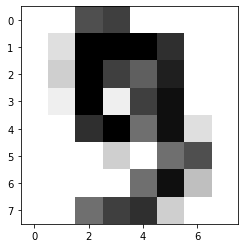

In [13]:
# method to plot a single digit
def plot_digit(digit_data):
    im = plt.imshow(digit_data.reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

# example - plot the third one in the dataset    
plot_digit(digits.data[9])

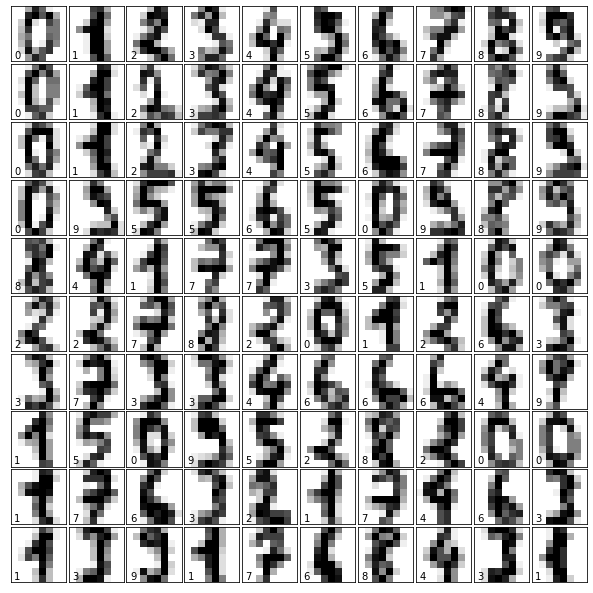

In [14]:
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(100):
    ax=fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))
plt.show()

### Project the data into 2D

In [15]:
reduced_data = PCA(n_components=2).fit_transform(data)


In [30]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

__origional data__

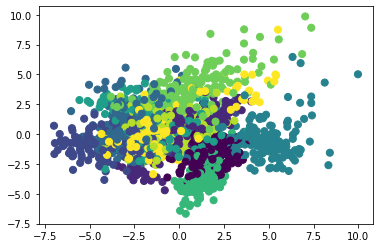

In [31]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, s=50, cmap='viridis')
plt.savefig('original.png')

([], <a list of 0 Text yticklabel objects>)

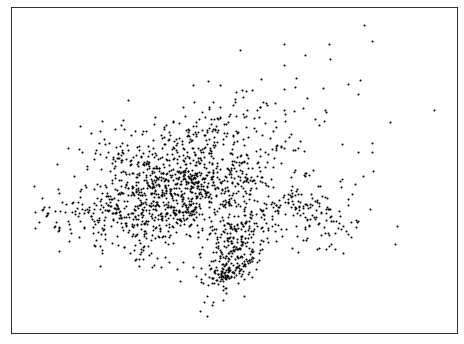

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## The task

Explore different model selection strategies to determine the number of clusters required for a Gaussian mixture clustering of this data (in the 2D PCA space) **and** the correct choice of covariance matrix structure (from the options listed above).

You should try multiple methods (BIC, AIC, Silhouette, and cross-validation)

Explore the clusterings suggested by each method, and look to see which digits are being grouped or split (if the optimal number is not 10 (digits 0-9).

The following method might be useful to plot the result of the clustering(s) and nice covariance ellipses

In [67]:
from matplotlib.patches import Ellipse
colors = ['navy', 'turquoise', 'darkorange','red','yellow','pink','maroon','chocolate','brown','darkgrey'] # will need to add other colours here if more clusters
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

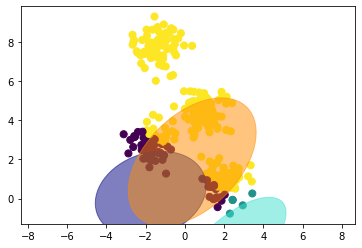

In [70]:
# Example usage
colors = ['navy', 'turquoise', 'darkorange']
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), s=50, cmap='viridis')
make_ellipses(gmm, plt.gca())



__1.AIC AND BIC__



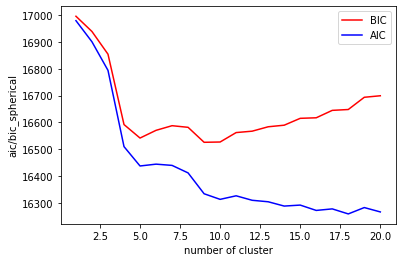

k with the lowest a/bic; value
18 16258.021461249213
9 16525.61103779132


In [22]:
aic=[]
bic=[]
for k in np.arange(1, 21):
    GMM = mixture.GaussianMixture(n_components = k, covariance_type='spherical')
    GMM.fit(reduced_data)
    aic_=GMM.aic(reduced_data)
    bic_=GMM.bic(reduced_data)
    aic.append(aic_)
    bic.append(bic_)

x_axis = range(1,21)
plt.xlabel('number of cluster')
plt.ylabel('aic/bic_spherical')
plt.plot(x_axis,bic,color="red")
plt.plot(x_axis,aic,color="blue")
plt.legend(('BIC','AIC'),loc='upper right')
plt.savefig('aicbic_spherical.png')
plt.show()
print('k with the lowest a/bic; value')
print(aic.index(min(aic))+1, min(aic))
print(bic.index(min(bic))+1, min(bic))

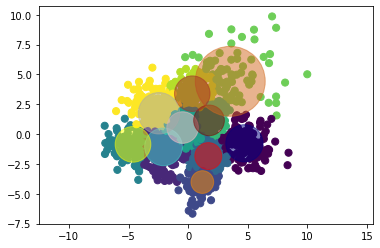

In [326]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 10,covariance_type='spherical')
X=reduced_data

gmm.fit(X)

plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('aicbic_ellipses.png')
plt.show()

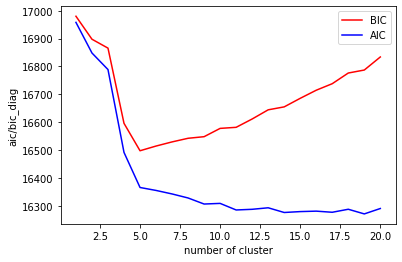

k with the lowest a/bic; value
19 16270.861612569966
5 16497.56153770734


In [291]:
aic=[]
bic=[]
for k in np.arange(1, 21):
    GMM = mixture.GaussianMixture(n_components = k, covariance_type='diag')
    GMM.fit(reduced_data)
    aic_=GMM.aic(reduced_data)
    bic_=GMM.bic(reduced_data)
    aic.append(aic_)
    bic.append(bic_)

x_axis = range(1,21)
plt.xlabel('number of cluster')
plt.ylabel('aic/bic_diag')
plt.plot(x_axis,bic,color="red")
plt.plot(x_axis,aic,color="blue")
plt.legend(('BIC','AIC'),loc='upper right')
plt.savefig('aicbic_diag.png')
plt.show()

print('k with the lowest a/bic; value')
print(aic.index(min(aic))+1, min(aic))
print(bic.index(min(bic))+1, min(bic))



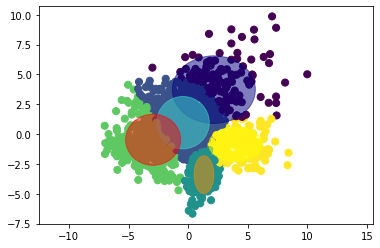

In [330]:
colors = ['navy', 'turquoise', 'darkorange','red','yellow']
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 5,covariance_type='diag')
X=reduced_data

gmm.fit(X)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('aicbic_ellipses2.png')
plt.show()


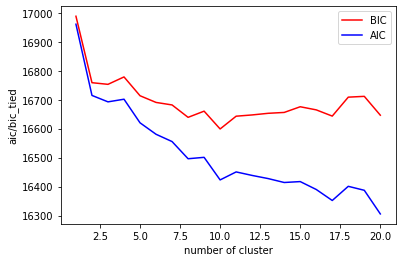

k with the lowest a/bic; value
20 16305.792189226115
10 16598.918496790116


In [292]:
aic=[]
bic=[]
for k in np.arange(1, 21):
    GMM = mixture.GaussianMixture(n_components = k, covariance_type='tied')
    GMM.fit(reduced_data)
    aic_=GMM.aic(reduced_data)
    bic_=GMM.bic(reduced_data)
    aic.append(aic_)
    bic.append(bic_)

x_axis = range(1,21)
plt.xlabel('number of cluster')
plt.ylabel('aic/bic_tied')
plt.plot(x_axis,bic,color="red")
plt.plot(x_axis,aic,color="blue")
plt.legend(('BIC','AIC'),loc='upper right')
plt.savefig('aicbic_tied.png')
plt.show()

print('k with the lowest a/bic; value')
print(aic.index(min(aic))+1, min(aic))
print(bic.index(min(bic))+1, min(bic))



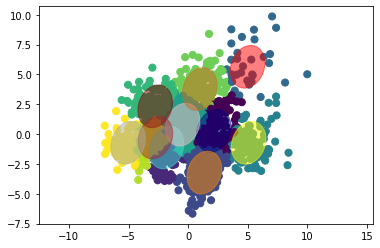

In [328]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 10,covariance_type='tied')
X=reduced_data

gmm.fit(X)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('aicbic_ellipses3.png')
plt.show()

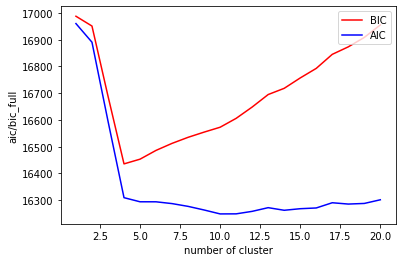

k with the lowest a/bic; value
10 16248.666021097595
4 16435.761672921286


In [295]:
aic=[]
bic=[]
for k in np.arange(1, 21):
    GMM = mixture.GaussianMixture(n_components = k, covariance_type='full')
    GMM.fit(reduced_data)
    aic_=GMM.aic(reduced_data)
    bic_=GMM.bic(reduced_data)
    aic.append(aic_)
    bic.append(bic_)

x_axis = range(1,21)
plt.xlabel('number of cluster')
plt.ylabel('aic/bic_full')
plt.plot(x_axis,bic,color="red")
plt.plot(x_axis,aic,color="blue")
plt.legend(('BIC','AIC'),loc='upper right')
plt.savefig('aicbic_full.png')
plt.show()

print('k with the lowest a/bic; value')
print(aic.index(min(aic))+1, min(aic))
print(bic.index(min(bic))+1, min(bic))

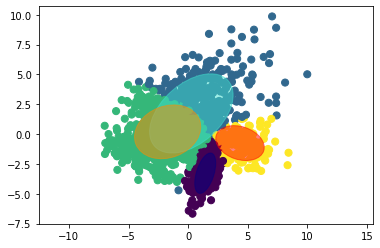

In [331]:
from sklearn import mixture
colors = ['navy', 'turquoise', 'darkorange','red']
gmm = mixture.GaussianMixture(n_components = 4,covariance_type='full')
X=reduced_data

gmm.fit(X)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('aicbic_ellipses4')
plt.show()




__2.Silhouette score__





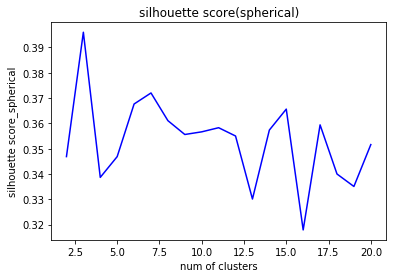

k with the highest silhouette score; value
3 0.39601370178684053


In [297]:
from sklearn import metrics
Silhouette=[]
for k in range(2,21):
    GMM=mixture.GaussianMixture(n_components=k,covariance_type='spherical')
    GMM.fit(reduced_data)
    Silhouette.append(metrics.silhouette_score(reduced_data,GMM.predict(reduced_data)))
x_axis=range(2,21)
plt.xlabel("num of clusters")
plt.ylabel("silhouette score_spherical")
plt.plot(x_axis,Silhouette,color="blue")
plt.title("silhouette score(spherical)")
plt.figure
plt.savefig('silhouette_spherical.png')
plt.show()
print('k with the highest silhouette score; value')
print(Silhouette.index(max(Silhouette))+2, max(Silhouette))

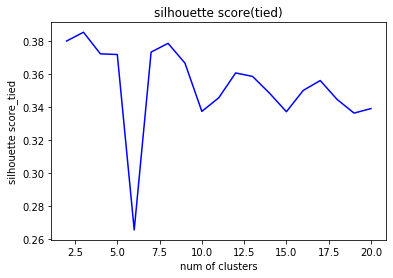

k with the highest silhouette score; value
3 0.38522969301648896


In [306]:
from sklearn import metrics
Silhouette=[]
for k in range(2,21):
    GMM=mixture.GaussianMixture(n_components=k,covariance_type='tied')
    GMM.fit(reduced_data)
    Silhouette.append(metrics.silhouette_score(reduced_data,GMM.predict(reduced_data)))
x_axis=range(2,21)
plt.xlabel("num of clusters")
plt.ylabel("silhouette score_tied")
plt.plot(x_axis,Silhouette,color="blue")
plt.title("silhouette score(tied)")
plt.savefig('silhouette_tied.png')
plt.show()
print('k with the highest silhouette score; value')
print(Silhouette.index(max(Silhouette))+2, max(Silhouette))

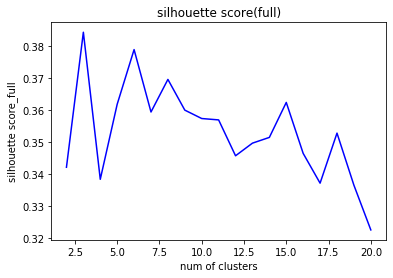

k with the highest silhouette score; value
3 0.38439468175013947


In [23]:
from sklearn import metrics
Silhouette=[]
for k in range(2,21):
    GMM=mixture.GaussianMixture(n_components=k,covariance_type='full')
    GMM.fit(reduced_data)
    Silhouette.append(metrics.silhouette_score(reduced_data,GMM.predict(reduced_data)))
x_axis=range(2,21)
plt.xlabel("num of clusters")
plt.ylabel("silhouette score_full")
plt.plot(x_axis,Silhouette,color="blue")
plt.title("silhouette score(full)")
plt.savefig('silhouette_full.png')
plt.show()
print('k with the highest silhouette score; value')
print(Silhouette.index(max(Silhouette))+2, max(Silhouette))

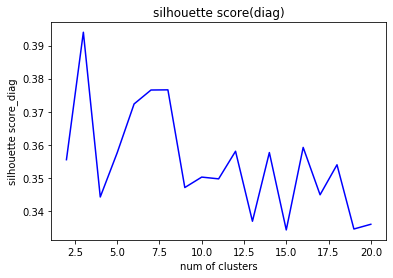

k with the highest silhouette score; value
3 0.39400344850412133


In [307]:
from sklearn import metrics
Silhouette=[]
for k in range(2,21):
    GMM=mixture.GaussianMixture(n_components=k,covariance_type='diag')
    GMM.fit(reduced_data)
    Silhouette.append(metrics.silhouette_score(reduced_data,GMM.predict(reduced_data)))
x_axis=range(2,21)
plt.xlabel("num of clusters")
plt.ylabel("silhouette score_diag")
plt.plot(x_axis,Silhouette,color="blue")
plt.title("silhouette score(diag)")
plt.savefig('silhouette_diag.png')
plt.show()
print('k with the highest silhouette score; value')
print(Silhouette.index(max(Silhouette))+2, max(Silhouette))

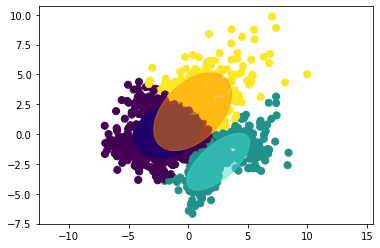

In [24]:
from sklearn import mixture
colors = ['navy', 'turquoise', 'darkorange']
gmm = mixture.GaussianMixture(n_components = 3,covariance_type='full')
X=reduced_data

gmm.fit(X)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('aicbic_ellipses_silhouette')
plt.show()

__Conclusion__
to use the Silhouette score to select best k, we can find 3 is the best. 




__3.crossvalidation__

we use 5 fold cross validation here


__Note__
- the `mixture.Gaussian` object has methods to compute BIC and AIC (`gmm.bic(X)` etc)
- you can also perform cross validation with a mixture, but computing the likelihood on held-out observations. The likelihood is the standard mixture likelihood:

$L = \prod_n \sum_k \pi_k p(x_n|k)$

where the product is over the held-out data, the sum is over the clusters, $\pi_k$ is the prior weight of cluster k (`gmm.weights_`) and $p(x_n|k)$ is the Gaussian likelihood of the nth observation in the kth cluster.

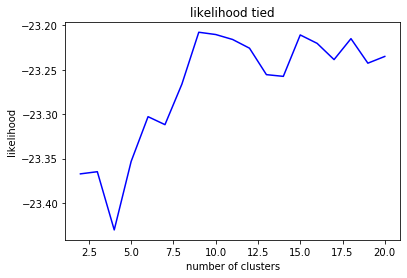

k with the highest likelihood; value
9 -23.20771154363771


In [140]:
kf = KFold(n_splits=5)
likelihood_1=[]
for K in range(2,21):
    likeli=[]
    for train_index, test_index in kf.split(reduced_data):
        gmm = mixture.GaussianMixture(n_components = K, covariance_type='tied')
        X_train,X_test=reduced_data[train_index],reduced_data[test_index]
        Y_train,Y_test=labels[train_index],labels[test_index]
        gmm.fit(X_train)
        score=gmm.score(X_test)
        score_sum=score.sum()
        product=score_sum.prod()
        likeli.append(product)       
    sum_likelihood=sum(likeli)
    likelihood_1.append(sum_likelihood)
x=range(2,21)
plt.xlabel('number of clusters')
plt.ylabel('likelihood')
plt.plot(x,likelihood_1,color='b')
plt.title('likelihood tied')
plt.savefig('cv_tied.png')
plt.show()
print('k with the highest likelihood; value')
print(likelihood_1.index(max(likelihood_1))+2, max(likelihood_1))

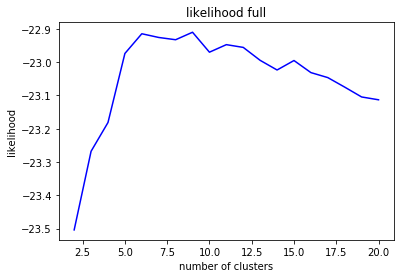

k with the highest likelihood; value
9 -22.910304495589408


In [151]:
kf = KFold(n_splits=5)
likelihood_1=[]
for K in range(2,21):
    likeli=[]
    for train_index, test_index in kf.split(reduced_data):
        gmm = mixture.GaussianMixture(n_components = K, covariance_type='full')
        X_train,X_test=reduced_data[train_index],reduced_data[test_index]
        Y_train,Y_test=labels[train_index],labels[test_index]
        gmm.fit(X_train)
        score=gmm.score(X_test)
        score_sum=score.sum()
        product=score_sum.prod()
        likeli.append(product)       
    sum_likelihood=sum(likeli)
    likelihood_1.append(sum_likelihood)
x=range(2,21)
plt.xlabel('number of clusters')
plt.ylabel('likelihood')
plt.plot(x,likelihood_1,color='b')
plt.title('likelihood full')
plt.savefig('cv_full.png')
plt.show()
print('k with the highest likelihood; value')
print(likelihood_1.index(max(likelihood_1))+2, max(likelihood_1))

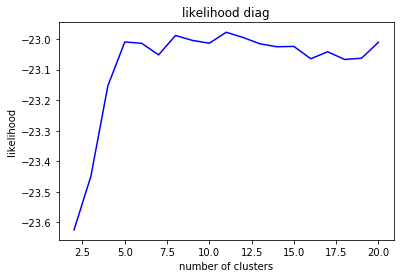

k with the highest likelihood; value
11 -22.977548952552752


In [142]:
kf = KFold(n_splits=5)
likelihood_1=[]
for K in range(2,21):
    likeli=[]
    for train_index, test_index in kf.split(reduced_data):
        gmm = mixture.GaussianMixture(n_components = K, covariance_type='diag')
        X_train,X_test=reduced_data[train_index],reduced_data[test_index]
        Y_train,Y_test=labels[train_index],labels[test_index]
        gmm.fit(X_train)
        score=gmm.score(X_test)
        score_sum=score.sum()
        product=score_sum.prod()
        likeli.append(product)       
    sum_likelihood=sum(likeli)
    likelihood_1.append(sum_likelihood)
x=range(2,21)
plt.xlabel('number of clusters')
plt.ylabel('likelihood')
plt.plot(x,likelihood_1,color='b')
plt.title('likelihood diag')
plt.savefig('cv_diag.png')
plt.show()
print('k with the highest likelihood; value')
print(likelihood_1.index(max(likelihood_1))+2, max(likelihood_1))

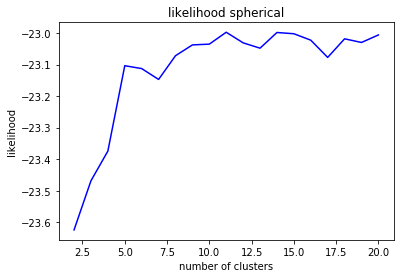

k with the highest likelihood; value
11 -22.99774552115638


In [146]:
kf = KFold(n_splits=5)
likelihood_1=[]
for K in range(2,21):
    likeli=[]
    for train_index, test_index in kf.split(reduced_data):
        gmm = mixture.GaussianMixture(n_components = K, covariance_type='spherical')
        X_train,X_test=reduced_data[train_index],reduced_data[test_index]
        Y_train,Y_test=labels[train_index],labels[test_index]
        gmm.fit(X_train)
        score=gmm.score(X_test)
        score_sum=score.sum()
        product=score_sum.prod()
        likeli.append(product)       
    sum_likelihood=sum(likeli)
    likelihood_1.append(sum_likelihood)
x=range(2,21)
plt.xlabel('number of clusters')
plt.ylabel('likelihood')
plt.plot(x,likelihood_1,color='b')
plt.title('likelihood spherical')
plt.savefig('cv_spherical.png')
plt.show()
print('k with the highest likelihood; value')
print(likelihood_1.index(max(likelihood_1))+2, max(likelihood_1))

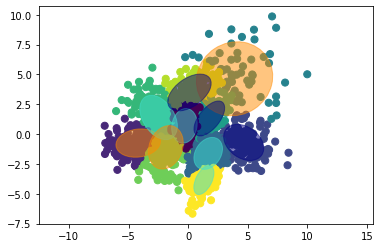

In [153]:
from sklearn import mixture
colors = [ 'turquoise', 'darkorange','navy', 'turquoise', 'darkorange','navy', 'turquoise', 'darkorange','navy', 'turquoise']
gmm = mixture.GaussianMixture(n_components = 10,covariance_type='full')
X=reduced_data

gmm.fit(X)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X),s=50,cmap='viridis')
make_ellipses(gmm,plt.gca())
plt.savefig('cv_ellipses')
plt.show()

In [68]:





#the others 






Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3758752087584748
For n_clusters = 3 The average silhouette_score is : 0.39121545857534834
For n_clusters = 4 The average silhouette_score is : 0.3880145233818706
For n_clusters = 5 The average silhouette_score is : 0.37935277116497484
For n_clusters = 6 The average silhouette_score is : 0.39070997940769353


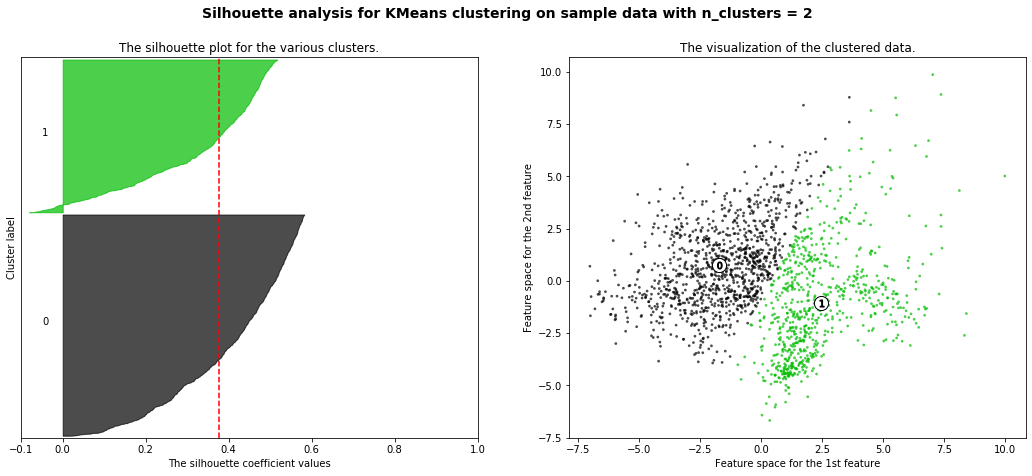

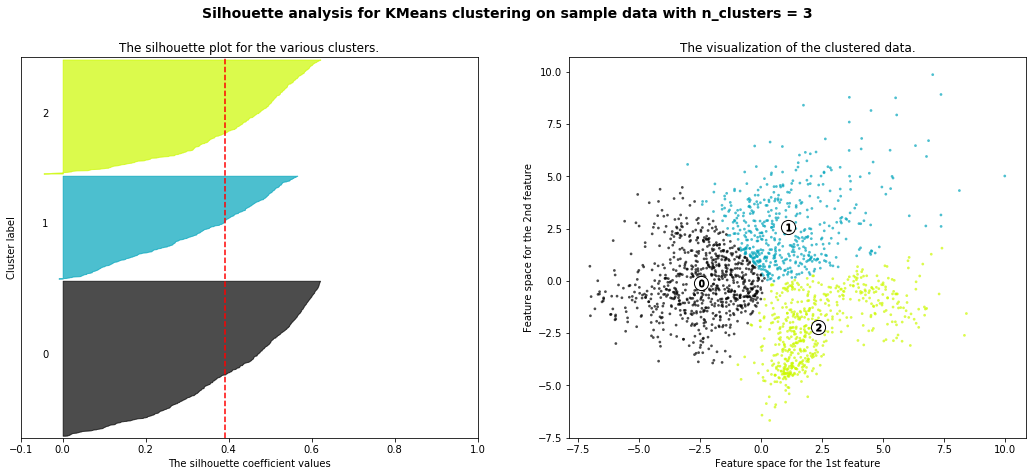

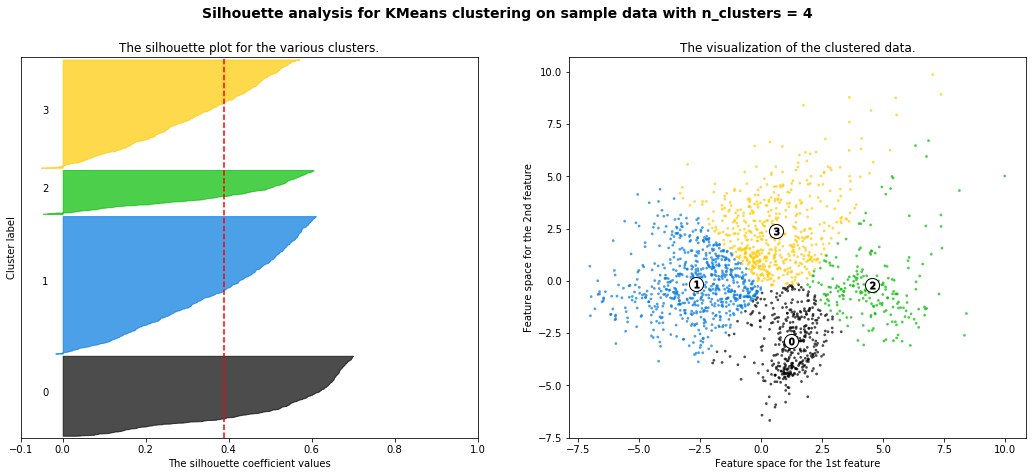

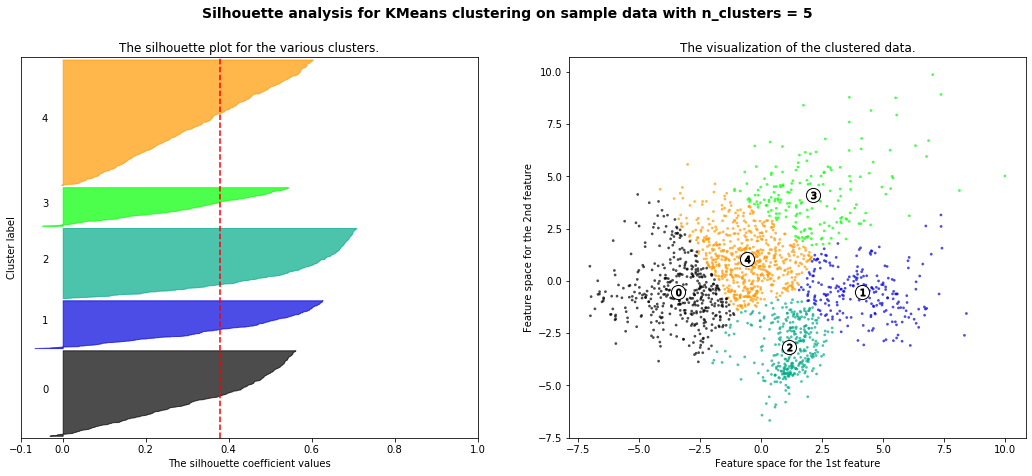

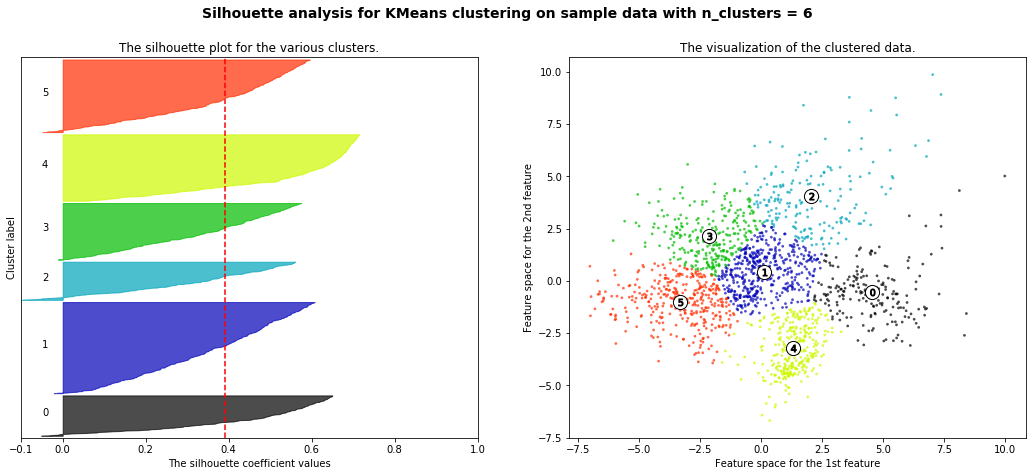

In [112]:
# k-means for choosing the k 

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.




range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Automatically created module for IPython interactive environment


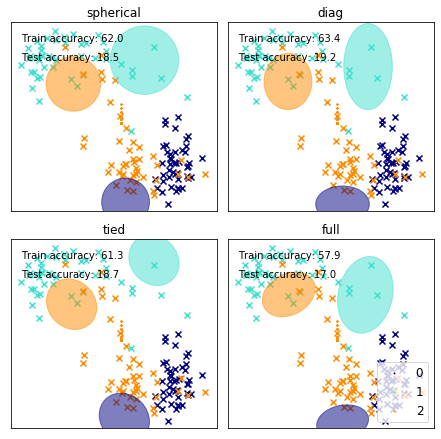

In [73]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

digits = load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(digits.data, digits.target)))


X_train = digits.data[train_index]
y_train = digits.target[train_index]
X_test = digits.data[test_index]
y_test = digits.target[test_index]



X_train=PCA(n_components=2).fit_transform(X_train)
X_test=PCA(n_components=2).fit_transform(X_test)
n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = digits.data[digits.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=digits.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()